# **Neural Networks Demystified [Part 1]**

Recommended [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for presenting this notebook:
````
jt -t grade3 -cellw=90% -fs=20 -tfs=20 -ofs=20
````

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


- Here's we'll get a little deeper into the [Neural Networks Demystified](https://www.youtube.com/watch?v=bxe2T-V8XRs) series.
- My hoped for outcome for you here is that you walk away with a fundamental understanding of the basic functioning of neural networks. There's lots of bells and whistles that we'll add later, but this module is just about **the basics**. 
- Really grasping the basics will serve you well when things start to get complex in the **deep learning** module.
- To keep our focuse on the network itself, we'll use really really simple toy data:

![](../graphics/nnd1.png)

- Let's get our data into numpy:

In [2]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

In [3]:
X

array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  2.]])

In [4]:
y

array([[75.],
       [82.],
       [93.]])

## What are we doing again?
Now, the big idea here, of course, is that we're going to use a neural network to predict your scores on a test based on how many hours you sleep and how many hours you study the night before.

![](../graphics/nnd2.png)

- This is a **supervised regression** problem. 
- What is the difference between supervised and unsupervised machine learning?
- What is the difference between regression and classification problems?

---

![](../graphics/nnd3.png)

- Before we get going, we need to scale our input data
- It's crazy how easy it is to forget to do this, and how **big** of a difference it can make.

In [5]:
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

In [6]:
X

array([[0.3, 1. ],
       [0.5, 0.2],
       [1. , 0.4]])

In [7]:
y

array([[0.75],
       [0.82],
       [0.93]])

## Neural Network Terminology

![](../graphics/nnd4.png)

## Synapses
- Synapses have a reall simple job.

![](../videos/nn_basics.gif)

---

## Neurons

![](../graphics/nnd5.png)

![](../graphics/spacer_small.png)

- Nuerons are responsible for adding up all their inputs and applying an activation function.

![](../graphics/NNQ8-01.png)

---

## Let's Setup out Network!

- I recommend watching [Nueral Networks Demystified Parts 1 - 4](https://www.youtube.com/watch?v=UJwK6jAStmg) before this section. 
- We'll skip the details here, and fill back in if we have time. However the main focus of this lecture is backprop!
- Here's our archicture:

![](../graphics/nnd6.png)

Our key variables:

|Code Symbol | Math Symbol | Definition | Dimensions
| :-: | :-: | :-: | :-: |
|X|$$X$$|Input Data, each row in an example| (numExamples, inputLayerSize)|
|y |$$y$$|target data|(numExamples, outputLayerSize)|
|W1 | $$W^{(1)}$$ | Layer 1 weights | (inputLayerSize, hiddenLayerSize) |
|W2 | $$W^{(2)}$$ | Layer 2 weights | (hiddenLayerSize, outputLayerSize) |
|z2 | $$z^{(2)}$$ | Layer 2 activation | (numExamples, hiddenLayerSize) |
|a2 | $$a^{(2)}$$ | Layer 2 activity | (numExamples, hiddenLayerSize) |
|z3 | $$z^{(3)}$$ | Layer 3 activation | (numExamples, outputLayerSize) |
|J | $$J$$ | Cost | (1, outputLayerSize) |

- Our "forward" equations:

## $$
z^{(2)} = XW^{(1)} \tag{1}\\
$$

## $$
a^{(2)} = f(z^{(2)}) \tag{2}\\
$$

## $$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$

## $$
\hat{y} = f(z^{(3)}) \tag{4}\\
$$

- And our python implementation of "forward" propogation.

In [8]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

---

## Let's try out our network!

In [9]:
NN = Neural_Network()

In [10]:
yHat = NN.forward(X)

In [11]:
yHat

array([[0.72460972],
       [0.45726262],
       [0.48234454]])

In [12]:
y

array([[0.75],
       [0.82],
       [0.93]])

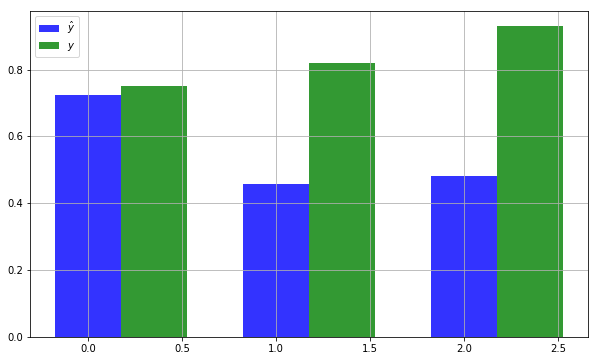

In [13]:
#Compare estimate, yHat, to actually score
fig = figure(0, (10, 6))
bar([0,1,2], yHat.ravel(), width = 0.35, color='b', alpha=0.8)
bar([0.35,1.35,2.35], y.ravel(), width = 0.35, color = 'g', alpha=0.8)

grid(1)
legend(['$\hat{y}$', '$y$'])

![](../graphics/spacer_small.png)

# Why are our predictions so bad?

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

---

## So, how do we make better predictions?
- A good place to start is by measuing just how bad our performance:

![](../videos/error_calculation.gif)

## $$
J = \sum \frac{1}{2}(y-\hat{y})^2 \tag{5}
$$

- J is our cost! To train our network we must **minimize our cost function**.
- What is the dimensionality of our cost?
- Now that we've defined our cost mathematically, let's code it up!

In [14]:
y

array([[0.75],
       [0.82],
       [0.93]])

In [15]:
yHat

array([[0.72460972],
       [0.45726262],
       [0.48234454]])

In [16]:
J = 0.5*sum((y-yHat)**2)

In [17]:
J

0.16630924160794136

- Our whole job now is to find some values of $W^{(1)}$ and $W^{(2)}$ that minimize J!
- How many numbers is this?

In [18]:
NN.W1

array([[-0.67100692, -0.69971486, -1.49377772],
       [-0.28767178, -1.06171566,  2.15447908]])

In [19]:
NN.W2

array([[-2.5570039 ],
       [-0.42195794],
       [ 2.40068876]])

- Just 9 numbers, how hard could this be!?

![](../videos/brute_force.gif)

# Why can't we just try all the Ws?

![](../graphics/spacer_small.png)

- This is a really important concept, we'll discuss in class quickly. 

---

- Since we can't just "try all the weights", we're going to have to be *more clever*. 
- One interesting idea is to constrain our search be computing which direction is "downhill" in the 9 dimensional space of our cost function input. 
- This idea is called **Gradient Descent**, and it's cool AF.

![](../graphics/nnd7.png)

- This is kinda fun to think about in high dimensional space.

![](../videos/grad_descent.gif)

# When might this fail?

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

![](../graphics/nnd8.png)

- Gradient descent fails if our loss function is non-convex
- Somehow, this is much less of problem than reserachers originally thought. 
- Check out [Yann Lecun's Fun Talk](https://www.youtube.com/watch?v=8zdo6cnCW2w) on this for more info.
- So ignoring that pesky convexity issue, if we're going to follow our gradient downwill, first we need to estimate or compute it!

---

### This is our job for the rest of today. Given our equations thusfar:

## $$
z^{(2)} = XW^{(1)} \tag{1}\\
$$
## $$
a^{(2)} = f(z^{(2)}) \tag{2}\\
$$
## $$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$
## $$
\hat{y} = f(z^{(3)}) \tag{4}\\
$$
## $$
J = \sum \frac{1}{2}(y-\hat{y})^2 \tag{5}\\
$$

### We want to estimate our gradients:

## $$ 
\frac{\partial J}{\partial W^{(1)}} = ? 
\frac{\partial J}{\partial W^{(2)}} = ? 
$$

We'll try something a little different and workout the details using some guided notes. These will be on github, be sure to print before the lecture!